In [4]:
from init_mnist import init, load
import numpy as np

In [357]:
# in case that dataset is missing or pickle is broken uncomment this
# init()

x_train, y_train, x_test, y_test = load()

# take first 1000 samples
x_train = x_train
y_train = y_train

# transform labels from [2] to [0,0,1,0,0,0,0,0,0,0]
OUT_CLASSES = 10

transformed_y_train = []

for y_label in y_train:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_train.append(zero)

y_train = transformed_y_train

transformed_y_test = []

for y_label in y_test:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_test.append(zero)

y_test = transformed_y_train

# normalize input, avoid divergence
x_train = x_train / 255
x_test = x_test / 255

In [345]:
def predict(input_data, weights):
    return input_data.dot(weights)

# calculate accuracy
def accuracy(x_train, y_train, weights):
    match = 0
    for input_, label in zip(x_train, y_train):
        if np.argmax(predict(input_, weights)) == np.argmax(label):
            match += 1

    return match / len(x_train)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [213]:
predict(x_train[0], init_weights)

array([13397.12439459, 13972.57462143, 14244.06852601, 12678.91260581,
       13801.35334837, 13002.50110294, 14132.42518159, 13567.25706641,
       14643.60908063, 14254.58873332])

In [365]:
def train(train_data, train_labels, init_weights, alpha, number_of_epoch):
    weights = init_weights
    print("Epoch:", end = '')
    
    acc_history = [accuracy(x_train, y_train, weights)]
    test_history = [accuracy(x_test, y_test, weights)]
    
    for i in range(number_of_epoch):
        print(".", end = '')
        for input_data, expected_data in zip(train_data, train_labels):
            # get prediction
            result = predict(input_data, weights)

            # delta between prediction and expected result -> vector
            delta = result - expected_data

            # mean square error -> vector
            error = delta ** 2

            # cast delta to matrix
            delta_matrix = np.matrix(delta)
            # cast input to matrix (numpy stuff)
            input_matrix = np.matrix(input_data).T

            a = alpha * input_matrix.dot(delta_matrix)

            # update weights via gradient descent
            weights = np.array(
                weights - alpha * input_matrix.dot(delta_matrix))
    #         print(weights - alpha * input_matrix.dot(delta_matrix))
    
        acc_history.append(accuracy(x_train, y_train, weights))
        test_history.append(accuracy(x_test, y_test, weights))
        
        # Early stopping
        if abs(acc_history[i] - acc_history[i+1]) < 0.01:
            print("Early stopping!")
            break

    return weights, acc_history, test_history

In [363]:
init_weights = np.random.rand(x_train.shape[1], 10)

weights = init_weights

weights, acc_history, test_history = train(x_train, y_train, weights, 0.01, 100)

(acc_history[-1], test_history[-1])

Epoch:.Early stopping!


(0.6983166666666667, 0.1002)

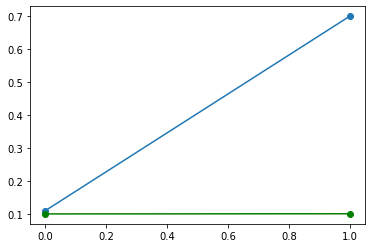

In [364]:
from matplotlib.pyplot import plot

# plot history and see poor generalization
plot(list(range(len(acc_history))), acc_history, 'o-')
plot(list(range(len(test_history))), test_history, 'go-')